## Predicting the rating of the book depending on reviews using NLP

**Features - Description**

- `id`	- The Id of Book
- `Title`	- Book Title
- `Price`	- The price of Book
- `User_id`	- Id of the user who rates the book
- `profileName`	- Name of the user who rates the book
- `review/helpfulness`	- helpfulness rating of the review, e.g. 2/3
- `review/score`	- rating from 0 to 5 for the book
- `review/time`	- time of given the review
- `review/summary`	- the summary of a text review
- `review/text`	- the full text of a review

Initial data was taken from the [Kaggle website](https://www.kaggle.com/datasets/mohamedbakhet/amazon-books-reviews)

For the deployment a use of Python 3.11.5 and Anaconda 3-2023.09 is recommended

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk

In [7]:
data_raw = pd.read_csv("books_data.csv")
rating_raw = pd.read_csv("Books_rating.csv")

In [8]:
# exploring data
data_raw.head()
# a book can have more than one authors. that's why here authors column contain data in the lost format
# a book can be under a couple of categories-> same stuff as above

,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount
0,Its Only Art If Its Well Hung!,NaN,['Julie Strain'],http://books.google.com/books/content?id=DykPA...,http://books.google.nl/books?id=DykPAAAACAAJ&d...,NaN,1996,http://books.google.nl/books?id=DykPAAAACAAJ&d...,['Comics & Graphic Novels'],NaN
1,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN
2,Wonderful Worship in Smaller Churches,This resource includes twelve principles in un...,['David R. Ray'],http://books.google.com/books/content?id=2tsDA...,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,NaN,2000,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,['Religion'],NaN
3,Whispers of the Wicked Saints,Julia Thomas finds her life spinning out of co...,['Veronica Haddon'],http://books.google.com/books/content?id=aRSIg...,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,iUniverse,2005-02,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,['Fiction'],NaN
4,"Nation Dance: Religion, Identity and Cultural ...",NaN,['Edward Long'],NaN,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,2003-03-01,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,NaN


A book can have more than one authors. That's why here authors column contains data in the list format. Same goes for the categories column

In [9]:
rating_raw.head()

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,1882931173,Its Only Art If Its Well Hung!,NaN,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",7/7,4.0,940636800,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...
1,0826414346,Dr. Seuss: American Icon,NaN,A30TK6U7DNS82R,Kevin Killian,10/10,5.0,1095724800,Really Enjoyed It,I don't care much for Dr. Seuss but after read...
2,0826414346,Dr. Seuss: American Icon,NaN,A3UH4UZ4RSVO82,John Granger,10/11,5.0,1078790400,Essential for every personal and Public Library,"If people become the books they read and if ""t..."
3,0826414346,Dr. Seuss: American Icon,NaN,A2MVUWT453QH61,"Roy E. Perry ""amateur philosopher""",7/7,4.0,1090713600,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D..."
4,0826414346,Dr. Seuss: American Icon,NaN,A22X4XUPKF66MR,"D. H. Richards ""ninthwavestore""",3/3,4.0,1107993600,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...


# Data merging

For the work with data we need to merge 2 datasets and, accordingly, get the final dataset for the future work

In [10]:
books = pd.merge(data_raw, rating_raw, on = 'Title') 

In [11]:
books.shape

(3000000, 19)

We will include columns we need for the analysys in the new (df) dataframe

In [12]:
df = books[['Title', 'review/score', 'review/text', 'categories', 'authors', 'ratingsCount']]

### Cleaning the data

Getting rid of the duplicate rows and the ones which contain some or all na values

In [13]:
df.drop_duplicates(inplace=True)

/var/folders/y7/ns6ckklx4k106_qfftdqhs_00000gn/T/ipykernel_64770/3006716147.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)


In [14]:
df.shape

(2617289, 6)

In [15]:
df.isna().sum()

Title               207
review/score          0
review/text           8
categories       465848
authors          350198
ratingsCount    1234897
dtype: int64

In [16]:
df.dropna(inplace=True)

/var/folders/y7/ns6ckklx4k106_qfftdqhs_00000gn/T/ipykernel_64770/1379821321.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1325891 entries, 47 to 2999995
Data columns (total 6 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   Title         1325891 non-null  object 
 1   review/score  1325891 non-null  float64
 2   review/text   1325891 non-null  object 
 3   categories    1325891 non-null  object 
 4   authors       1325891 non-null  object 
 5   ratingsCount  1325891 non-null  float64
dtypes: float64(2), object(4)
memory usage: 70.8+ MB


### Resampling the data

In [18]:
data = df.sample(10000)

### Preprocessing

Reformating the 'authors' column - from the list to string

In [19]:
data['authors'] = data['authors'].str.extract(r'\'(.*)\'')

In [20]:
data.head(15)

,Title,review/score,review/text,categories,authors,ratingsCount
1742676,Stones from the River,1.0,This book is written from a slightly different...,['Fiction'],Ursula Hegi,2.0
663194,To Kill A Mockingbird,5.0,Harper Lee's &quot;To Kill a Mockingbird&quot;...,['Fiction'],Harper Lee,2164.0
2120029,White Fang,5.0,This is the first book I read on my Android ta...,['American fiction'],Jack London,1.0
269121,Kiss Alive Forever: The Complete Touring History,5.0,Mssrs. Gooch and Suhs have done it! A exhausti...,['Music'],"Curt Gooch', 'Jeff Suhs",2.0
1584561,The Lord of the Rings (3 Volume Set),5.0,"2APR2012: Not sure why, but Amazon has my revi...","['Baggins, Bilbo (Fictitious character)']",J. R. R. Tolkien,704.0
1136107,Catch 22 (catch-22),5.0,This book is savagely funny and deadly serious...,['Fiction'],Joseph Heller,333.0
1947375,The Lord Of The Rings THREE VOLUME BOXED SET (...,5.0,First off this review is about this edition on...,['Fantasy fiction'],John Ronald Reuel Tolkien,147.0
626833,Hegel's Philosophy of right,5.0,This is a really great book -- it's like commu...,['History'],Georg Wilhelm Fredrich Hegel,2.0
2523098,Dying Well,5.0,"I ran across this book by accident, when my mo...",['Family & Relationships'],Ira Byock,1.0
1621271,I Spy Two Eyes: Numbers in Art,5.0,We bought the paperback edition.My child loves...,['Juvenile Fiction'],Lucy Micklethwait,1.0


Reformating the 'categories' column - from the list to string

In [21]:
data['categories'] = data['categories'].str.extract(r'\'(.*)\'')

In [22]:
data.head(15)

,Title,review/score,review/text,categories,authors,ratingsCount
1742676,Stones from the River,1.0,This book is written from a slightly different...,Fiction,Ursula Hegi,2.0
663194,To Kill A Mockingbird,5.0,Harper Lee's &quot;To Kill a Mockingbird&quot;...,Fiction,Harper Lee,2164.0
2120029,White Fang,5.0,This is the first book I read on my Android ta...,American fiction,Jack London,1.0
269121,Kiss Alive Forever: The Complete Touring History,5.0,Mssrs. Gooch and Suhs have done it! A exhausti...,Music,"Curt Gooch', 'Jeff Suhs",2.0
1584561,The Lord of the Rings (3 Volume Set),5.0,"2APR2012: Not sure why, but Amazon has my revi...","Baggins, Bilbo (Fictitious character)",J. R. R. Tolkien,704.0
1136107,Catch 22 (catch-22),5.0,This book is savagely funny and deadly serious...,Fiction,Joseph Heller,333.0
1947375,The Lord Of The Rings THREE VOLUME BOXED SET (...,5.0,First off this review is about this edition on...,Fantasy fiction,John Ronald Reuel Tolkien,147.0
626833,Hegel's Philosophy of right,5.0,This is a really great book -- it's like commu...,History,Georg Wilhelm Fredrich Hegel,2.0
2523098,Dying Well,5.0,"I ran across this book by accident, when my mo...",Family & Relationships,Ira Byock,1.0
1621271,I Spy Two Eyes: Numbers in Art,5.0,We bought the paperback edition.My child loves...,Juvenile Fiction,Lucy Micklethwait,1.0


### EDA

Displaying the pie chart- distribution of the top10 (according to the quantity of reviews) books based on genre

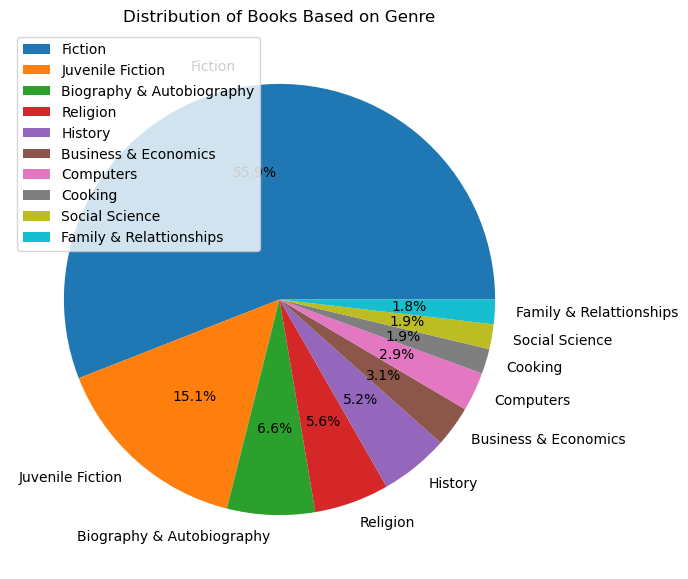

In [23]:
plt.figure(figsize=(9,7))
labels = ["Fiction", 'Juvenile Fiction', 'Biography & Autobiography', 'Religion', 'History', 'Business & Economics', 'Computers', 'Cooking', 'Social Science', 'Family & Relattionships']
plt.pie(data['categories'].value_counts().head(10), labels = labels, autopct='%1.1f%%')
plt.title("Distribution of Books Based on Genre")
plt.legend()
plt.show()

Diaplaying the wordcloud for the review text (with the review rating above 3)

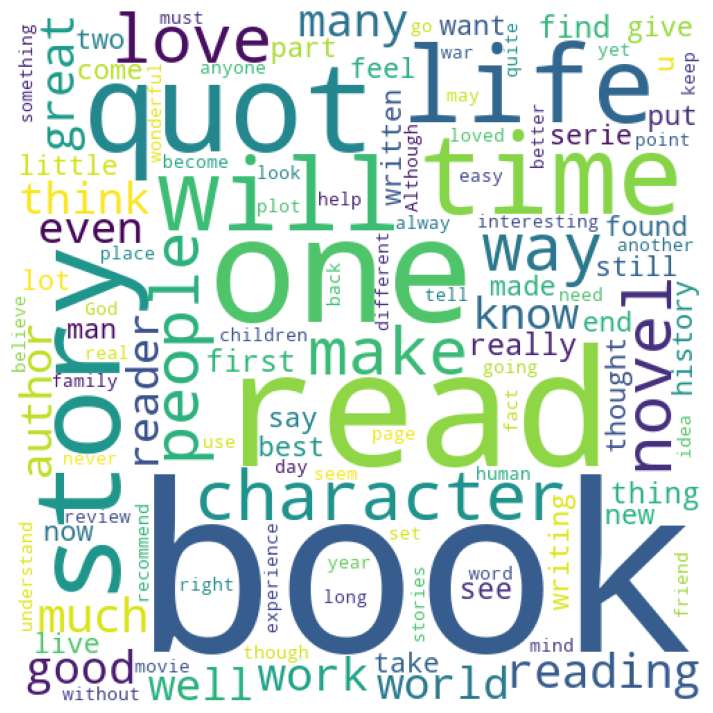

In [65]:
# !pip3 install wordcloud
from wordcloud import WordCloud
wc  = WordCloud(width=500, height=500, min_font_size=12, background_color='white')
wc_gen = wc.generate(data[data['review/score']>3]['review/text'].str.cat(sep = " "))
plt.figure(figsize=(9,9))
plt.axis('off')
plt.imshow(wc_gen)

Diaplaying the distribution of the review scores

<Axes: xlabel='review/score'>

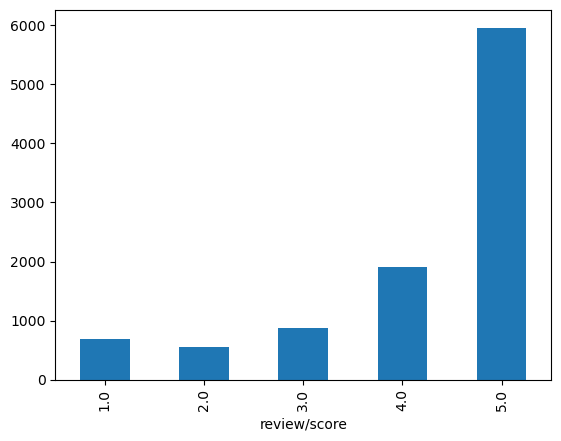

In [25]:
data["review/score"].value_counts().sort_index().plot(kind='bar')


# HISTOGRAM IS FOR INTERVALs (continuous variables)
# BARPLOT IS FOR DESCRETE VARIABLES

In [66]:
tab = pd.crosstab(index=data['review/score'], columns='count')
tab

col_0,count
review/score,
1.0,696
2.0,558
3.0,879
4.0,1905
5.0,5962


Boxplot grouped by review/score ratings count

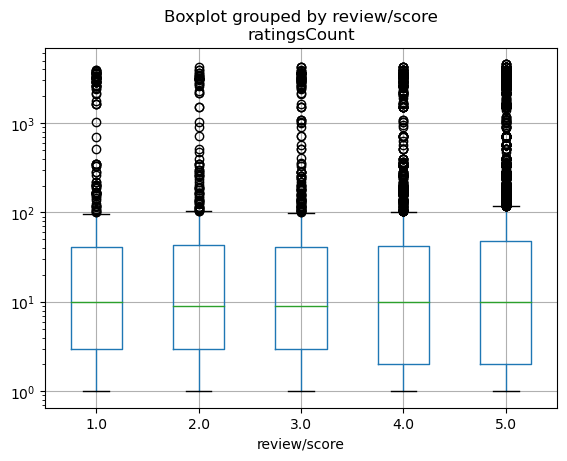

In [27]:
# not important
# plt.scatter(data['review/score'], data['ratingsCount']
data.boxplot(by="review/score", column="ratingsCount")
plt.yscale("log")
plt.show()
# most of the books had a review a very small number of times
# so we are taking  a logarithmic scale (шкалу)

# Sentiment Analysis

For conducting the sentimentt analysis we need to prepr

In [28]:
!pip3 install vaderSentiment

In [29]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
vader = SentimentIntensityAnalyzer()

In [30]:
data['clean_reviews'] = data['review/text'].str.lower()
data['score'] = data['clean_reviews'].apply(lambda review: vader.polarity_scores(review))
data.head(5)

,Title,review/score,review/text,categories,authors,ratingsCount,clean_reviews,score
1742676,Stones from the River,1.0,This book is written from a slightly different...,Fiction,Ursula Hegi,2.0,this book is written from a slightly different...,"{'neg': 0.089, 'neu': 0.842, 'pos': 0.069, 'co..."
663194,To Kill A Mockingbird,5.0,Harper Lee's &quot;To Kill a Mockingbird&quot;...,Fiction,Harper Lee,2164.0,harper lee's &quot;to kill a mockingbird&quot;...,"{'neg': 0.115, 'neu': 0.751, 'pos': 0.133, 'co..."
2120029,White Fang,5.0,This is the first book I read on my Android ta...,American fiction,Jack London,1.0,this is the first book i read on my android ta...,"{'neg': 0.059, 'neu': 0.748, 'pos': 0.193, 'co..."
269121,Kiss Alive Forever: The Complete Touring History,5.0,Mssrs. Gooch and Suhs have done it! A exhausti...,Music,"Curt Gooch', 'Jeff Suhs",2.0,mssrs. gooch and suhs have done it! a exhausti...,"{'neg': 0.034, 'neu': 0.733, 'pos': 0.233, 'co..."
1584561,The Lord of the Rings (3 Volume Set),5.0,"2APR2012: Not sure why, but Amazon has my revi...","Baggins, Bilbo (Fictitious character)",J. R. R. Tolkien,704.0,"2apr2012: not sure why, but amazon has my revi...","{'neg': 0.076, 'neu': 0.781, 'pos': 0.143, 'co..."


In [31]:
data['compound'] = data['score'].apply(lambda score: score['compound'])

In [32]:
data.head(10)

,Title,review/score,review/text,categories,authors,ratingsCount,clean_reviews,score,compound
1742676,Stones from the River,1.0,This book is written from a slightly different...,Fiction,Ursula Hegi,2.0,this book is written from a slightly different...,"{'neg': 0.089, 'neu': 0.842, 'pos': 0.069, 'co...",-0.4737
663194,To Kill A Mockingbird,5.0,Harper Lee's &quot;To Kill a Mockingbird&quot;...,Fiction,Harper Lee,2164.0,harper lee's &quot;to kill a mockingbird&quot;...,"{'neg': 0.115, 'neu': 0.751, 'pos': 0.133, 'co...",0.8374
2120029,White Fang,5.0,This is the first book I read on my Android ta...,American fiction,Jack London,1.0,this is the first book i read on my android ta...,"{'neg': 0.059, 'neu': 0.748, 'pos': 0.193, 'co...",0.9698
269121,Kiss Alive Forever: The Complete Touring History,5.0,Mssrs. Gooch and Suhs have done it! A exhausti...,Music,"Curt Gooch', 'Jeff Suhs",2.0,mssrs. gooch and suhs have done it! a exhausti...,"{'neg': 0.034, 'neu': 0.733, 'pos': 0.233, 'co...",0.9839
1584561,The Lord of the Rings (3 Volume Set),5.0,"2APR2012: Not sure why, but Amazon has my revi...","Baggins, Bilbo (Fictitious character)",J. R. R. Tolkien,704.0,"2apr2012: not sure why, but amazon has my revi...","{'neg': 0.076, 'neu': 0.781, 'pos': 0.143, 'co...",0.9689
1136107,Catch 22 (catch-22),5.0,This book is savagely funny and deadly serious...,Fiction,Joseph Heller,333.0,this book is savagely funny and deadly serious...,"{'neg': 0.225, 'neu': 0.688, 'pos': 0.087, 'co...",-0.9948
1947375,The Lord Of The Rings THREE VOLUME BOXED SET (...,5.0,First off this review is about this edition on...,Fantasy fiction,John Ronald Reuel Tolkien,147.0,first off this review is about this edition on...,"{'neg': 0.014, 'neu': 0.775, 'pos': 0.211, 'co...",0.9976
626833,Hegel's Philosophy of right,5.0,This is a really great book -- it's like commu...,History,Georg Wilhelm Fredrich Hegel,2.0,this is a really great book -- it's like commu...,"{'neg': 0.0, 'neu': 0.745, 'pos': 0.255, 'comp...",0.5341
2523098,Dying Well,5.0,"I ran across this book by accident, when my mo...",Family & Relationships,Ira Byock,1.0,"i ran across this book by accident, when my mo...","{'neg': 0.079, 'neu': 0.792, 'pos': 0.129, 'co...",0.8689
1621271,I Spy Two Eyes: Numbers in Art,5.0,We bought the paperback edition.My child loves...,Juvenile Fiction,Lucy Micklethwait,1.0,we bought the paperback edition.my child loves...,"{'neg': 0.0, 'neu': 0.825, 'pos': 0.175, 'comp...",0.9863


In [33]:
data['Sentiment'] = data['compound'].apply(lambda x: 'positive' if x >= 0.05 else 'negative' if x < -0.05 else 'neutral')
data.head()

,Title,review/score,review/text,categories,authors,ratingsCount,clean_reviews,score,compound,Sentiment
1742676,Stones from the River,1.0,This book is written from a slightly different...,Fiction,Ursula Hegi,2.0,this book is written from a slightly different...,"{'neg': 0.089, 'neu': 0.842, 'pos': 0.069, 'co...",-0.4737,negative
663194,To Kill A Mockingbird,5.0,Harper Lee's &quot;To Kill a Mockingbird&quot;...,Fiction,Harper Lee,2164.0,harper lee's &quot;to kill a mockingbird&quot;...,"{'neg': 0.115, 'neu': 0.751, 'pos': 0.133, 'co...",0.8374,positive
2120029,White Fang,5.0,This is the first book I read on my Android ta...,American fiction,Jack London,1.0,this is the first book i read on my android ta...,"{'neg': 0.059, 'neu': 0.748, 'pos': 0.193, 'co...",0.9698,positive
269121,Kiss Alive Forever: The Complete Touring History,5.0,Mssrs. Gooch and Suhs have done it! A exhausti...,Music,"Curt Gooch', 'Jeff Suhs",2.0,mssrs. gooch and suhs have done it! a exhausti...,"{'neg': 0.034, 'neu': 0.733, 'pos': 0.233, 'co...",0.9839,positive
1584561,The Lord of the Rings (3 Volume Set),5.0,"2APR2012: Not sure why, but Amazon has my revi...","Baggins, Bilbo (Fictitious character)",J. R. R. Tolkien,704.0,"2apr2012: not sure why, but amazon has my revi...","{'neg': 0.076, 'neu': 0.781, 'pos': 0.143, 'co...",0.9689,positive


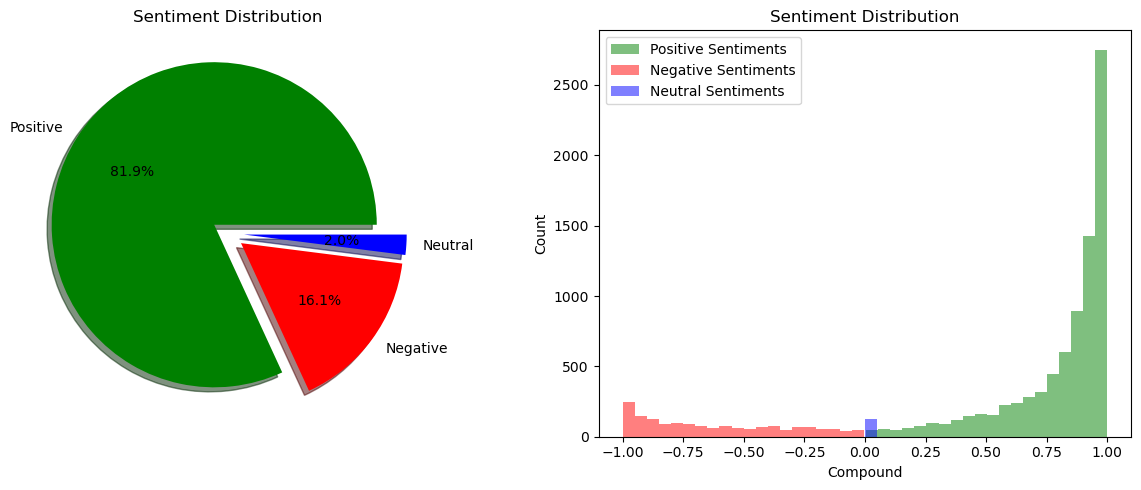

In [34]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
labels = ["Positive", "Negative", "Neutral"]
sizes = data["Sentiment"].value_counts()
colors = ["green", "red", "blue"]
explode = (0.1,0.1,0.1)

plt.pie(sizes, explode = explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True)
plt.title("Sentiment Distribution")

plt.subplot(1,2,2)
positive = data[data['compound'] > 0 ]['compound']
negative = data[data['compound'] < 0 ]['compound']
neutral = data[data['compound'] == 0 ]['compound']

sentiments = [positive, negative, neutral]
colors = ['green', 'red', 'blue']
labels = ["Positive Sentiments", "Negative Sentiments", "Neutral Sentiments"]


for sentiment, color, label in zip(sentiments, colors, labels):
    plt.hist(sentiment, bins=20, color=color, alpha=0.5, label=label)

plt.title("Sentiment Distribution")
plt.xlabel("Compound")
plt.ylabel("Count")
plt.legend()
plt.tight_layout()
plt.show()

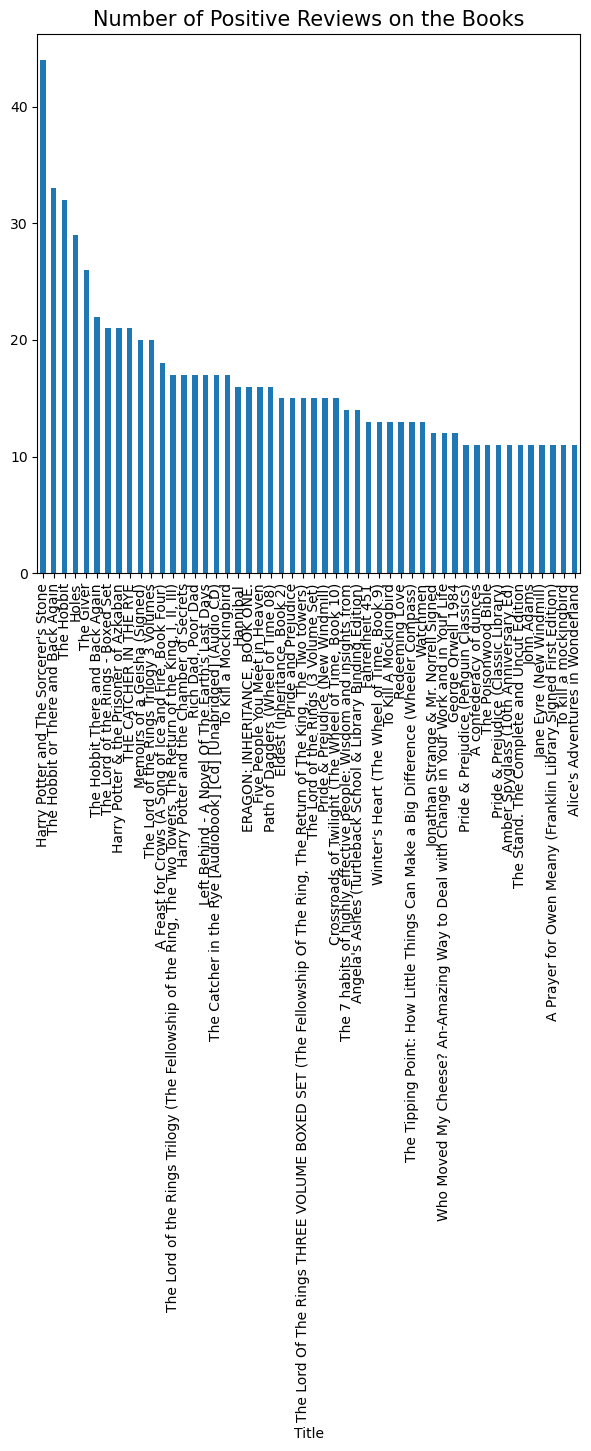

In [35]:
data[data["Sentiment"] == "positive"]["Title"].value_counts().head(50).plot(kind="bar", figsize=(7,7))
plt.title("Number of Positive Reviews on the Books", fontsize=15)
plt.show()

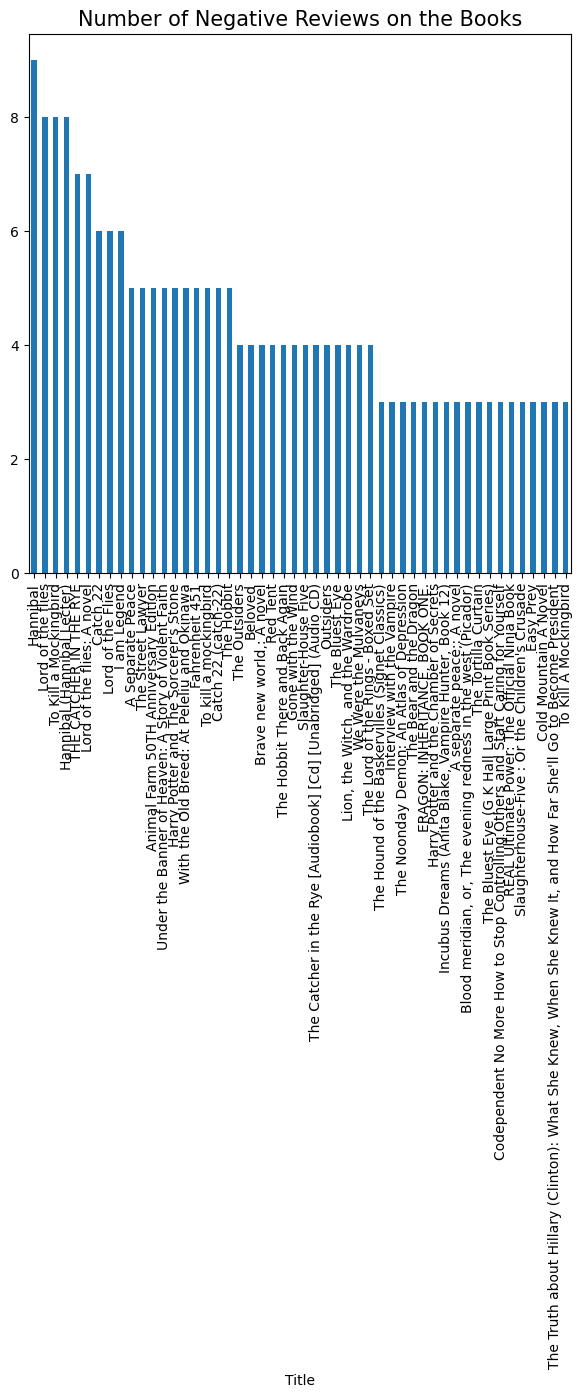

In [36]:
data[data["Sentiment"] == "negative"]["Title"].value_counts().head(50).plot(kind="bar", figsize=(7,7))
plt.title("Number of Negative Reviews on the Books", fontsize=15)
plt.show()

In [37]:
reviews_df = data[['clean_reviews', 'Sentiment']]
reviews_df.head()

,clean_reviews,Sentiment
1742676,this book is written from a slightly different...,negative
663194,harper lee's &quot;to kill a mockingbird&quot;...,positive
2120029,this is the first book i read on my android ta...,positive
269121,mssrs. gooch and suhs have done it! a exhausti...,positive
1584561,"2apr2012: not sure why, but amazon has my revi...",positive


In [38]:
x = reviews_df.drop(['Sentiment'], axis=1)
y = reviews_df['Sentiment']

In [39]:
x.shape

(10000, 1)

In [40]:
y.shape

(10000,)

In [41]:
import numpy as np
import pandas as pd
import seaborn as sns
import nltk

In [42]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ekaterinashtyrkova/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/ekaterinashtyrkova/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/ekaterinashtyrkova/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [43]:
import re
stemmer = nltk.SnowballStemmer('english')
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))

In [44]:
print(stopword)

{'yours', 'these', "should've", 'weren', 'o', 'as', "it's", 'them', 'on', 'again', "couldn't", 'further', 'an', 'how', 'hasn', 'while', 'he', 'by', "you've", "doesn't", 'couldn', 'off', 'too', 'and', 'hers', 'above', 'who', 'are', 'themselves', 'i', "wouldn't", 'for', 'there', 'am', 'not', 'other', 'where', 'few', 'didn', 'some', 'myself', 'herself', 'once', 'when', 'hadn', 'ours', 'having', 'this', 'from', 'theirs', 'now', 'y', 'what', 'down', 'will', 'about', 'during', "won't", 'shan', 'here', 'were', "don't", 've', "shan't", 'haven', 'into', 'doing', 'isn', 'through', 'won', 'below', "that'll", 'is', 'they', 'ourselves', 'then', 'did', 'had', 'both', 'being', 'its', 'against', 't', 'll', 'no', 'was', 'to', 'same', "didn't", 'you', 'between', 'it', 'up', 'mustn', 'can', "haven't", 'me', 'my', 'until', 'have', 're', "mustn't", "isn't", 'doesn', 'in', 'because', 'own', 'been', "you'd", 'she', 'mightn', "weren't", 'which', 'but', 'under', 'just', 'only', 'do', 'himself', 'our', 'wasn', 

In [45]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer, WordNetLemmatizer
import re, string, unicodedata
from string import punctuation

In [46]:
def url(text):
    return re.sub(r'http\S+', '', text)

def remove_special_characters(text):
    pattern=r'[^a-zA-Z0-9\s]'
    text = re.sub(pattern, '', text)
    return text

def lemmi(text):
    lemmatizer = WordNetLemmatizer()
    text=" ".join([lemmatizer.lemmatize(word) for word in text.split()])
    return text

def final_clean(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stopword and i.strip().lower().isalpha():
            final_text.append(i.strip().lower())
    return " ".join(final_text)

def clean(text):
    text = url(text)
    text = remove_special_characters(text)
    text = lemmi(text)
    text = final_clean(text)
    return text


In [47]:
from nltk.corpus import wordnet

In [48]:
x["clean_reviews"] = x["clean_reviews"].apply(clean)

In [49]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=2024)

In [50]:
x_train

,clean_reviews
1568153,ive always interested alternate history whatif...
705998,platform new series page action rest page page...
1372550,give book read every year like peprally living...
2591163,story wa farfetched drawn character improbable...
2765399,ive read one book asprin one myth series enjoy...
...,...
2811275,great book wonderful classic formatted well ki...
947324,ordered book arrived earlier expected perfect ...
470308,although book clever imagery imaginative descr...
827721,rare find author could successfully gracefully...


In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [52]:
tfidf_vectorizer = TfidfVectorizer()
x_train_tfidf = tfidf_vectorizer.fit_transform(x_train['clean_reviews'])

In [53]:
x_test_tfidf = tfidf_vectorizer.transform(x_test['clean_reviews'])

In [54]:
x_train_tfidf_df = pd.DataFrame(x_train_tfidf.toarray())
x_test_tfidf_df = pd.DataFrame(x_test_tfidf.toarray())

### Logistic Regression

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [56]:
log = LogisticRegression()
log.fit(x_train_tfidf_df, y_train)

LogisticRegression()

In [57]:
pred_log = log.predict(x_test_tfidf_df)

In [58]:
print(classification_report(pred_log, y_test))

              precision    recall  f1-score   support

    negative       0.17      0.91      0.29        79
     neutral       0.00      0.00      0.00         1
    positive       1.00      0.84      0.91      2420

    accuracy                           0.84      2500
   macro avg       0.39      0.58      0.40      2500
weighted avg       0.97      0.84      0.89      2500



In [59]:
from sklearn.metrics import confusion_matrix

In [60]:
confusion_matrix(y_test, pred_log)

array([[  72,    1,  344],
       [   0,    0,   42],
       [   7,    0, 2034]])

### Balancing

In [61]:
#!pip3 install -U imbalanced-learn scikit-learn

# pip install scikit-learn==<desired_version>

#!pip install imbalanced-learn==0.8.0 scikit-learn==0.24.2


from imblearn.over_sampling import SMOTE

ImportError: cannot import name '_MissingValues' from 'sklearn.utils._param_validation' (/Users/ekaterinashtyrkova/anaconda3/lib/python3.11/site-packages/sklearn/utils/_param_validation.py)

In [ ]:
oversample = SMOTE()
x_train_bal, y_train_bal = oversample.fit_resample(x_train_tfidf_df, y_train)
y_train_bal.value_counts()

negative    6071
positive    6071
neutral     6071
Name: Sentiment, dtype: int64

In [ ]:
x_test_bal, y_test_bal = oversample.fit_resample(x_test_tfidf, y_test)
y_test_bal.value_counts()

positive    2081
negative    2081
neutral     2081
Name: Sentiment, dtype: int64

### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
classifier = DecisionTreeClassifier(criterion="entropy", random_state=2024)
classifier.fit(x_train_tfidf_df, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=2024)

In [ ]:
pred_tree = classifier.predict(x_test_tfidf_df)

In [ ]:
print(classification_report(pred_tree, y_test))

              precision    recall  f1-score   support

    negative       0.35      0.32      0.34       412
     neutral       0.17      0.16      0.16        51
    positive       0.85      0.87      0.86      2037

    accuracy                           0.77      2500
   macro avg       0.46      0.45      0.45      2500
weighted avg       0.76      0.77      0.76      2500



### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(x_train_tfidf_df, y_train)

RandomForestClassifier()

In [ ]:
pred_rf =rf.predict(x_test_tfidf_df)

In [ ]:
confusion_matrix(y_test, pred_rf)

array([[   9,    0,  363],
       [   0,    1,   46],
       [   2,    0, 2079]])

In [ ]:
print(classification_report(pred_rf, y_test))

              precision    recall  f1-score   support

    negative       0.02      0.82      0.05        11
     neutral       0.02      1.00      0.04         1
    positive       1.00      0.84      0.91      2488

    accuracy                           0.84      2500
   macro avg       0.35      0.88      0.33      2500
weighted avg       0.99      0.84      0.91      2500



### Predict Balance

### Logistic regression

In [ ]:
log_bal = LogisticRegression()
log_bal.fit(x_train_bal, y_train_bal)

LogisticRegression()

In [ ]:
pred_log_bal = log_bal.predict(x_test_bal)

In [ ]:
print(classification_report(pred_log_bal, y_test_bal))

              precision    recall  f1-score   support

    negative       0.64      0.68      0.66      1935
     neutral       0.11      0.86      0.20       279
    positive       0.91      0.47      0.62      4029

    accuracy                           0.55      6243
   macro avg       0.55      0.67      0.49      6243
weighted avg       0.79      0.55      0.61      6243



### Decision Tree

In [ ]:
dt_bal = DecisionTreeClassifier(criterion="entropy", random_state=2024)
dt_bal.fit(x_train_bal, y_train_bal)

DecisionTreeClassifier(criterion='entropy', random_state=2024)

In [ ]:
pred_tree_bal = dt_bal.predict(x_test_bal)

In [ ]:
print(classification_report(pred_tree_bal, y_test_bal))

              precision    recall  f1-score   support

    negative       0.53      0.61      0.57      1824
     neutral       0.35      0.85      0.49       850
    positive       0.81      0.47      0.60      3569

    accuracy                           0.56      6243
   macro avg       0.56      0.64      0.55      6243
weighted avg       0.67      0.56      0.57      6243



### Random Forest

In [ ]:
rf_bal = RandomForestClassifier(n_estimators=100)
rf_bal.fit(x_train_bal, y_train_bal)

RandomForestClassifier()

In [ ]:
pred_rf_bal = rf_bal.predict(x_test_bal)

In [ ]:
print(classification_report(pred_rf_bal, y_test_bal))

              precision    recall  f1-score   support

    negative       0.42      0.84      0.56      1040
     neutral       0.04      1.00      0.08        88
    positive       0.96      0.39      0.56      5115

    accuracy                           0.47      6243
   macro avg       0.47      0.74      0.40      6243
weighted avg       0.86      0.47      0.55      6243



### Predict

In [ ]:
def predict(text):
    input_text = [text]
    text_to_vec = tfidf_vectorizer.transform(input_text).toarray()
    prediction = log_bal.predict(text_to_vec)
    return prediction

In [ ]:
text = "This book is just terrible, and I honestly can't understand how it could have positive reviews. The plot is too predictable, the characters are flat and absolutely uninteresting. I spent so much time hoping that something would change, but alas, it didn't. The author's writing style is only irritating. The phrases seem overly cliché, and the dialogues feel unnatural. I was ready to give this book a chance, but with every page, I become more convinced that it was a complete waste of time. Moreover, the editing leaves much to be desired. Grammar and punctuation errors found are simply unforgivable, especially when you're trying to immerse yourself in the plot. I can't recommend this book to anyone, and I'm even considering returning it to the store. Honestly, it's one of the worst pieces I've ever read. "
output = predict(text)
print(output)

['negative']
